In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#nr respondenti
df = pd.read_csv('./surveyDataSience.csv', header=None)
df.columns = df.iloc[1]
df = df.iloc[2:].reset_index(drop=True)
numar_respondenti = df.shape[0] #shape[0]--nr de randuri
print(f"Numarul de respondenti: {numar_respondenti}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_2016\2889055255.py:2: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./surveyDataSience.csv', header=None)


Numarul de respondenti: 25973


In [3]:
#nr atribute si tipuri
numar_atribute = df.shape[1] #shape[1]--nr de coloane
tipuri_atribute = df.dtypes #afiseaza tipul fiecarei coloane
print("Numar atribute:", numar_atribute)
print("Tipuri atribute:\n", tipuri_atribute)

Numar atribute: 369
Tipuri atribute:
 1
Duration (in seconds)                                                                                                                                                               object
What is your age (# years)?                                                                                                                                                         object
What is your gender? - Selected Choice                                                                                                                                              object
In which country do you currently reside?                                                                                                                                           object
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                                                                     object
                         

In [4]:
#nr de respondenti cu date complete
respondenti_completi = df.dropna().shape[0] #dorpna() elimina randurile cu valori lipsa
print("Respondenti cu date complete:", respondenti_completi)

Respondenti cu date complete: 0


In [5]:
def get_education_years():
    return {
        'Master’s degree': 5, 
        'Bachelor’s degree': 3,  
        'Some college/university study without earning a bachelor’s degree': 2,
        'Doctoral degree': 8,   
        'Professional doctorate': 8  
    }

def calculate_avg_years(education_frequency):
    education_years = get_education_years()
    
    total_years = 0
    valid_responses = 0
    for education_level, frequency in education_frequency.items():
        if education_level != 'I prefer not to answer':
            total_years += frequency * education_years.get(education_level, 0)
            valid_responses += frequency
            
    return total_years / valid_responses if valid_responses > 0 else 0

avg_total = calculate_avg_years(df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_dict())

respondenti_romania = df[df['In which country do you currently reside?'] == 'Romania']
avg_romania = calculate_avg_years(respondenti_romania['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_dict())

respondenti_romania_femei = respondenti_romania[respondenti_romania['What is your gender? - Selected Choice'] == 'Woman']
avg_romania_femei = calculate_avg_years(respondenti_romania_femei['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_dict())

print('Avg total:', avg_total)
print('Avg Romania:', avg_romania)
print('Avg Romania femei:', avg_romania_femei)


Avg total: 4.3040716483863335
Avg Romania: 4.8
Avg Romania femei: 5.375


In [6]:
respondenti_romania = df[df['In which country do you currently reside?'] == 'Romania']
respondenti_romania_femei = respondenti_romania[respondenti_romania['What is your gender? - Selected Choice'] == 'Woman']

data_femei_romania_complete = respondenti_romania_femei.dropna()

nr_femei_romania_complete = data_femei_romania_complete.shape[0]
print("Nr de femei din Ro cu date complete:", nr_femei_romania_complete)

Nr de femei din Ro cu date complete: 0


In [8]:
femei_romania_pyhton = respondenti_romania_femei[respondenti_romania_femei['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'] == 'Python']
femei_romania_cpp = respondenti_romania_femei[respondenti_romania_femei['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++'] == 'C++']
print("Nuar de femei din Romania care programeaza in Python:", femei_romania_pyhton.shape[0])
print("Nuar de femei din Romania care programeaza in C++:", femei_romania_cpp.shape[0])

Nuar de femei din Romania care programeaza in Python: 12
Nuar de femei din Romania care programeaza in C++: 4


In [9]:
print("Interval femei Python:",max(femei_romania_pyhton['What is your age (# years)?'].dropna().value_counts().to_dict()))
print("Interval femei Python:",max(femei_romania_cpp['What is your age (# years)?'].dropna().value_counts().to_dict()))

print("Domeniul de valori posibile:")
def get_column_domain(df):
    # Împărțim coloanele pentru a identifica întrebările similare
    question_prefixes = {}
    
    for column in df.columns:
        # Extragem prefixul întrebării (adică prima parte, până la „-”)
        if '-' in column:
            prefix = column.split('-')[0].strip()
        else:
            prefix = column.strip()

        if prefix not in question_prefixes:
            question_prefixes[prefix] = []

        question_prefixes[prefix].append(column)

    # Pentru fiecare întrebare, afișăm domeniul de valori
    for prefix, columns in question_prefixes.items():
        print(f"\nQuestion: {prefix}")
        
        # Dacă sunt mai multe opțiuni pentru aceleași întrebări, concatenăm valorile posibile
        all_values = set()  # Folosim un set pentru a evita duplicatele
        for column in columns:
            # Extragem valorile unice pentru fiecare coloană
            unique_values = df[column].dropna().apply(lambda x: str(x).strip().lower()).unique()
            all_values.update(unique_values)
        
        # Concatenează valorile și le ordonează
        concatenated_values = ', '.join(sorted(all_values))
        print(f"Domain: {concatenated_values}")

# Apelăm funcția pentru a obține domeniul de definiție pentru toate coloanele
get_column_domain(df)




Interval femei Python: 40-44
Interval femei Python: 35-39
Domeniul de valori posibile:

Question: Duration (in seconds)
Domain: 1000, 10006, 1001, 1002, 1003, 1004, 100459, 100481, 1005, 10055, 1006, 100647, 10068, 1007, 1008, 1009, 100937, 10096, 1010, 101091, 1011, 1012, 10121, 10129, 1013, 10131, 1014, 1015, 1016, 1017, 10170, 10174, 1017585, 1018, 10181, 1019, 10198, 1020, 1021, 10216, 1022, 1023, 10233, 1024, 1025, 10254, 1026, 102654, 1027, 1028, 102838, 1029, 1030, 10303, 1031, 10316, 1032, 103249, 10326, 1033, 1034, 103413, 1035, 103582, 1036, 10367, 10368, 1037, 1037024, 1038, 1039, 10394, 10398, 1040, 10407, 1041, 1042, 10425, 1043, 104307, 10434, 1044, 10441, 1045, 10456, 1046, 1046469, 1047, 104700, 1047088, 1048, 10485, 1049, 1050, 10504, 10507, 1051, 1052, 105233, 10525, 1053, 1054, 1055, 105547, 1056, 1057, 10578, 1058, 1059, 1060, 1061, 1062, 10620, 1063, 10634, 106380, 1064, 1065, 10654, 1066, 106642, 1067, 106730, 1068, 106893, 1069, 1070, 10704, 10708, 1071, 10710, 1

In [10]:
def transform_experience_to_years(experience_str):
    # Mapăm intervalele de vechime în ani (folosim mijlocul intervalului pentru fiecare)
    experience_map = {
        '1-3 years': 2,
        '< 1 years': 0.5,
        '3-5 years': 4,
        '5-10 years': 7.5,
        '10-20 years': 15,
        '20+ years': 20,
        'I have never written code': 0
    }
    return experience_map.get(experience_str.strip(), np.nan)

experience = df['For how many years have you been writing code and/or programming?'].dropna().value_counts().to_dict()

# Creăm o listă cu vechimea în ani, replicând de câte ori apare fiecare interval
experience_values = []
for exp_interval, count in experience.items():
    if exp_interval != 'I have never written code':
        experience_values.extend([transform_experience_to_years(exp_interval)] * count)

# Calculăm momentele de ordin 1 și 2
min_experience = np.min(experience_values)
max_experience = np.max(experience_values)
mean_experience = np.mean(experience_values)
std_experience = np.std(experience_values)
median_experience = np.median(experience_values)

# Afișăm rezultatele
print(f"Minimul: {min_experience:.2f} ani")
print(f"Maximul: {max_experience} ani")
print(f"Media: {mean_experience:.2f} ani")
print(f"Deviatia standard: {std_experience:.2f}")
print(f"Mediana: {median_experience} ani")


Minimul: 0.50 ani
Maximul: 20.0 ani
Media: 5.13 ani
Deviatia standard: 5.83
Mediana: 2.0 ani


['18-21', '25-29', '22-24', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']


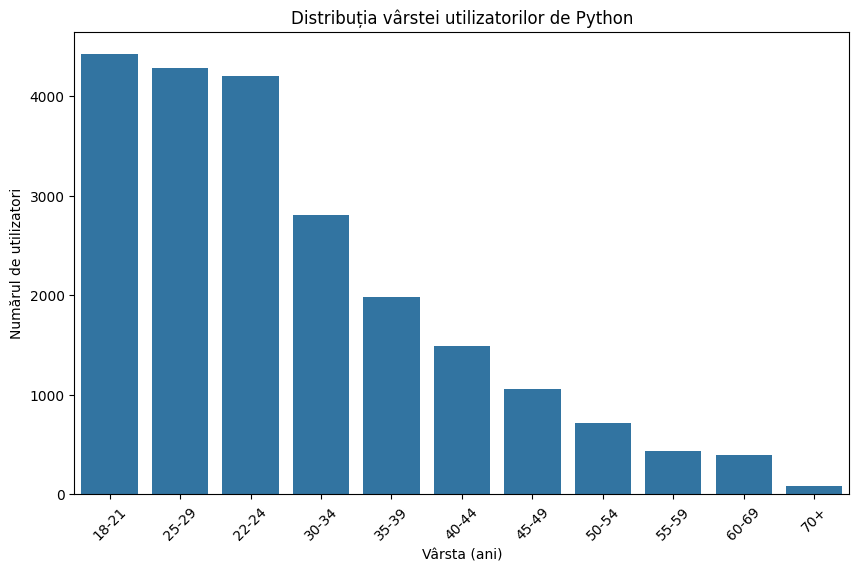

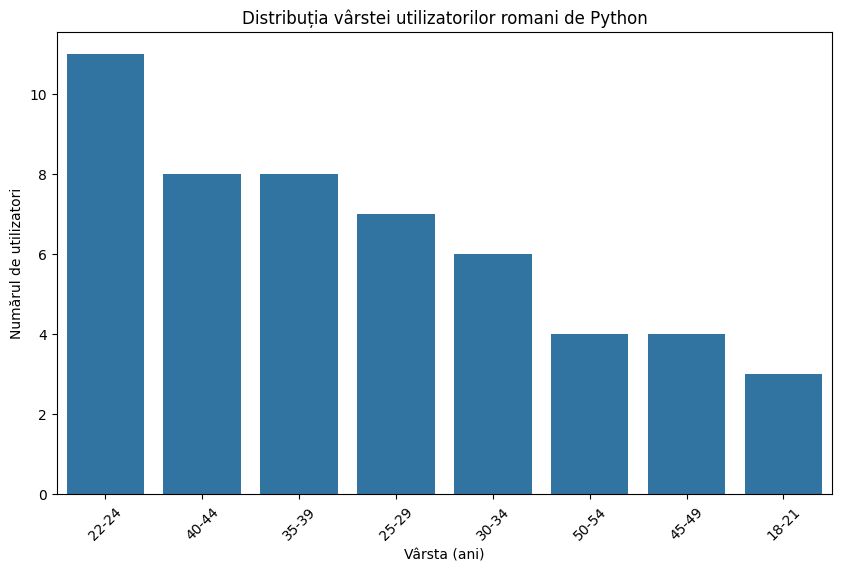

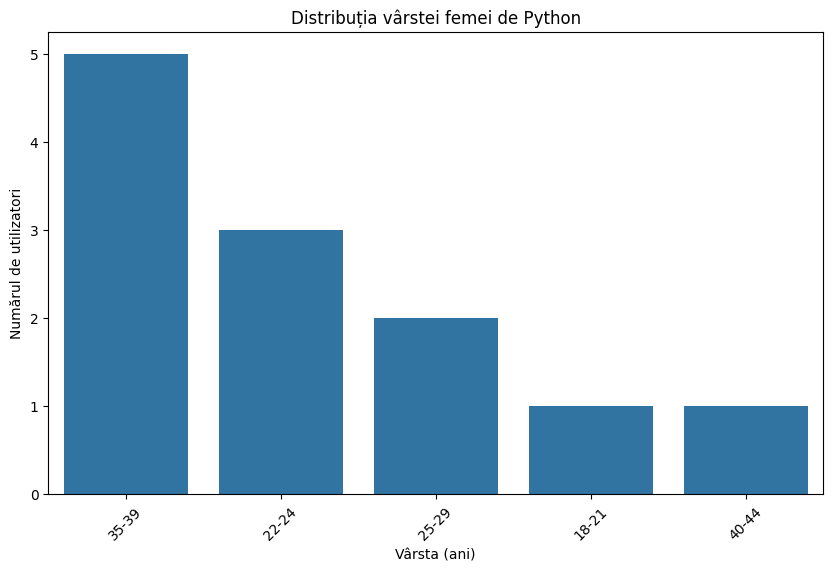

In [ ]:
python_users = df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'] == 'Python']
python_users_age = python_users['What is your age (# years)?'].dropna().value_counts().to_dict()


print(list(python_users_age.keys()))

# Creăm distribuția vârstei utilizatorilor de Python
plt.figure(figsize=(10, 6))
sns.countplot(data=python_users, x='What is your age (# years)?', order=list(python_users_age.keys()))
plt.title('Distribuția vârstei utilizatorilor de Python')
plt.xticks(rotation=45)
plt.xlabel('Vârsta (ani)')
plt.ylabel('Numărul de utilizatori')
plt.show()

# Creăm distribuția vârstei utilizatorilor romani de Python
python_users_romania = python_users[python_users['In which country do you currently reside?'] == 'Romania']
python_users_romania_age = python_users_romania['What is your age (# years)?'].dropna().value_counts().to_dict()
plt.figure(figsize=(10, 6))
sns.countplot(data=python_users_romania, x='What is your age (# years)?', order=list(python_users_romania_age.keys()))
plt.title('Distribuția vârstei utilizatorilor romani de Python')
plt.xticks(rotation=45)
plt.xlabel('Vârsta (ani)')
plt.ylabel('Numărul de utilizatori')
plt.show()

# Creăm distribuția vârstei utilizatorilor femei de Python
femei_romania_python = python_users_romania[python_users_romania['What is your gender? - Selected Choice'] == 'Woman']
femei_romania_python_age = femei_romania_python['What is your age (# years)?'].dropna().value_counts().to_dict()
plt.figure(figsize=(10, 6))
sns.countplot(data=femei_romania_python, x='What is your age (# years)?', order=list(femei_romania_python_age.keys()))
plt.title('Distribuția vârstei femei de Python')
plt.xticks(rotation=45)
plt.xlabel('Vârsta (ani)')
plt.ylabel('Numărul de utilizatori')
plt.show()






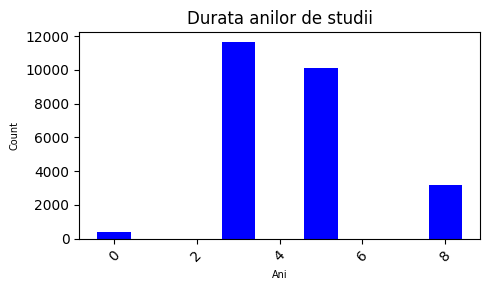

{5: 10132, 3: 11642, 8: 3155, 0: 417}


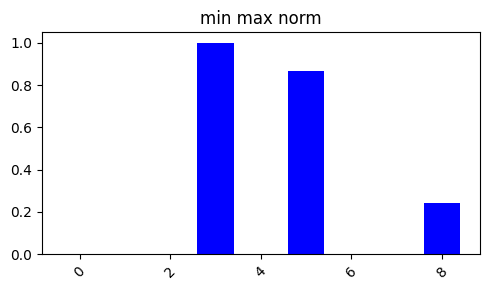

In [12]:
education_total = df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_dict()

ani_modificati = {
    5: education_total.get('Master’s degree', 0),
    3: (education_total.get('Bachelor’s degree', 0) + 
                     education_total.get('Some college/university study without earning a bachelor’s degree', 0)),
    8: (education_total.get('Doctoral degree', 0) + 
                     education_total.get('Professional doctorate', 0)),
    0: education_total.get('No formal education past high school', 0)
}

plt.figure(figsize=(5, 3))
plt.bar(ani_modificati.keys(), ani_modificati.values(), color='blue')
    
plt.title("Durata anilor de studii")
plt.xlabel("Ani", fontsize=7)
plt.ylabel("Count", fontsize=7)
    
plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

minim = min(ani_modificati.values())
maxim = max(ani_modificati.values())

minmaxNorm = {
    key: (val-minim) / (maxim - minim) for key, val in ani_modificati.items()
}
print(ani_modificati)
plt.figure(figsize=(5, 3))
plt.bar(minmaxNorm.keys(), minmaxNorm.values(), color='blue')
    
plt.title("min max norm")
    
plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

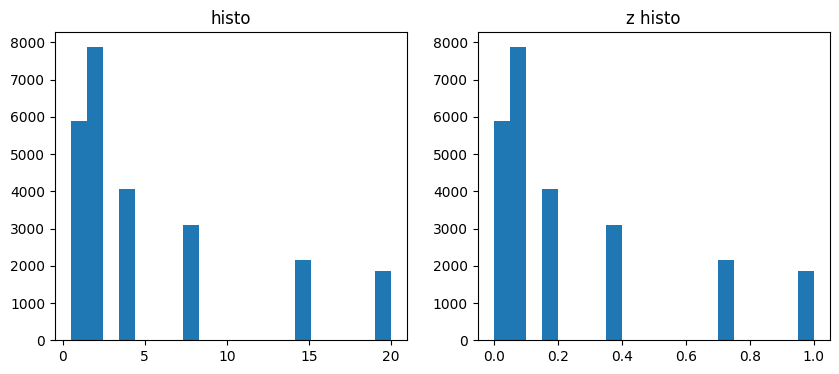

In [ ]:
print(experience_values)
values_norm = []
minim = min(experience_values)
maxim = max(experience_values)
for exp in experience_values:
    values_norm.append((exp-minim) / (maxim-minim))
print(values_norm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.hist(experience_values, 20)
ax1.set_title('histo')
ax2.hist(values_norm, 20)
ax2.set_title("z histo")
plt.show()
#5 all